In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape training and test datasets into num_samples, pizels, width, height
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# One hot encode labels to 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# convert from integers to floats and normalize to range [0, 1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = (X_train / 255.0)
X_test = (X_test / 255.0)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
# convolutional layer with RELU, 32 conv filters with size 3x3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
# 64 conv filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# take max value in each kernel to pool
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
# use softmax to reshape into output probabilities size
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
batch_size = 128
num_epoch = 30

model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/30
469/469 [==============================] - 15s 13ms/step - loss: 2.2740 - accuracy: 0.1953 - val_loss: 2.2380 - val_accuracy: 0.4211
Epoch 2/30
469/469 [==============================] - 6s 12ms/step - loss: 2.2141 - accuracy: 0.3142 - val_loss: 2.1609 - val_accuracy: 0.6092
Epoch 3/30
469/469 [==============================] - 5s 10ms/step - loss: 2.1327 - accuracy: 0.4186 - val_loss: 2.0584 - val_accuracy: 0.6913
Epoch 4/30
469/469 [==============================] - 5s 10ms/step - loss: 2.0252 - accuracy: 0.4904 - val_loss: 1.9210 - val_accuracy: 0.7293
Epoch 5/30
469/469 [==============================] - 5s 10ms/step - loss: 1.8867 - accuracy: 0.5438 - val_loss: 1.7463 - val_accuracy: 0.7475
Epoch 6/30
469/469 [==============================] - 5s 10ms/step - loss: 1.7200 - accuracy: 0.5792 - val_loss: 1.5416 - val_accuracy: 0.7649
Epoch 7/30
469/469 [==============================] - 5s 11ms/step - loss: 1.5389 - accuracy: 0.6113 - val_loss: 1.3328 - val_accuracy: 0.780

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.3715432584285736
Test accuracy: 0.8978000283241272


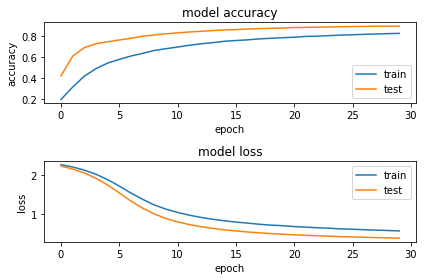

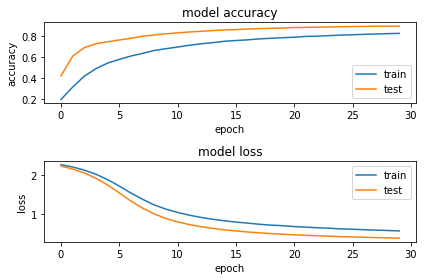

In [ ]:
import os
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

In [ ]:
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)

model.save("model_digit.h5")
print("Saved model to disk")

Saved model to disk
